In [1]:
%load_ext tensorboard

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import datetime
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

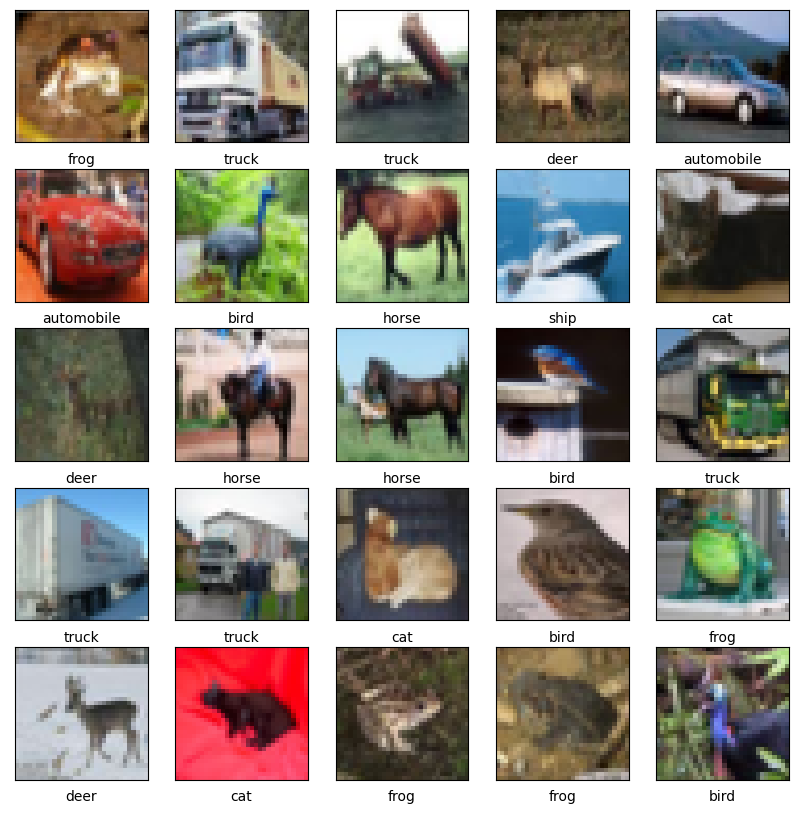

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

from keras.api._v2.keras import activations
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
   
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
t_loss, t_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/15
1563/1563 [==============================] - 31s 19ms/step - loss: 1.5429 - accuracy: 0.4354 - val_loss: 1.4507 - val_accuracy: 0.4897
Epoch 2/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1974 - accuracy: 0.5728 - val_loss: 1.1059 - val_accuracy: 0.6054
Epoch 3/15
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0485 - accuracy: 0.6324 - val_loss: 1.0154 - val_accuracy: 0.6393
Epoch 4/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9545 - accuracy: 0.6659 - val_loss: 0.9583 - val_accuracy: 0.6651
Epoch 5/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8773 - accuracy: 0.6933 - val_loss: 1.0247 - val_accuracy: 0.6399
Epoch 6/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8222 - accuracy: 0.7117 - val_loss: 0.9356 - val_accuracy: 0.6762
Epoch 7/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7744 - accuracy: 0.7291 - val_loss: 0.8969 -

In [11]:
t_loss, t_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.9217 - accuracy: 0.7017 - 2s/epoch - 6ms/step


In [14]:
%tensorboard --logdir logs/fit

# prediction

In [90]:
import cv2
import numpy as np

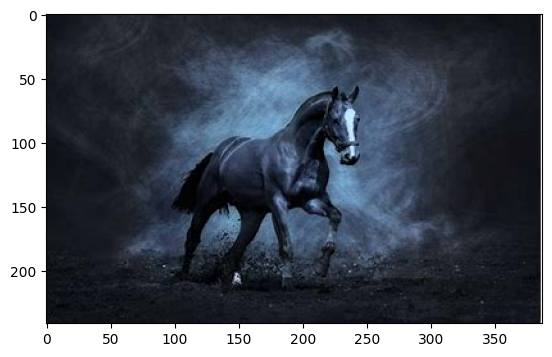

(241, 387, 3)

In [91]:
img = cv2.imread('fig.jpg')
plt.imshow(img)
plt.show()
img.shape

In [92]:
img = img/255
img = cv2.resize(img, dsize=(32, 32))
img = img.reshape(1, 32, 32, 3)
img.shape

(1, 32, 32, 3)

In [93]:
res = model.predict(x)

1/1 [==============================] - 0s 19ms/step


In [94]:
res

array([[-2.3067496 , -4.82043   ,  1.369576  ,  0.9063751 ,  0.92218536,
         1.5898175 , -1.3547636 ,  1.9503644 , -8.562426  , -1.5704589 ]],
      dtype=float32)

In [95]:
print(class_names[np.argmax(res)])

horse
